In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load and Explore the Data

In [2]:
df = pd.read_csv("C:\\Users\\Acer\\Downloads\\force2020_data.csv")

In [3]:
df.head(3)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615


In [4]:
df.shape

(18270, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [6]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


- There are 18270 rows with 6 columns
- All the features are floats

In [7]:
df.duplicated().sum()    # checking duplicate rows 

0

In [8]:
df.columns.duplicated().sum()   # checking duplicates columns

0

In [9]:
df.corr()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
RHOB,1.000000,0.176968,0.745932,-0.856195,0.280469,-0.824429
GR,0.176968,1.000000,0.139264,0.270694,-0.042698,0.081199
DEPTH_MD,0.745932,0.139264,1.000000,-0.654578,0.374282,-0.832520
NPHI,-0.856195,0.270694,-0.654578,1.000000,-0.259631,0.892950
PEF,0.280469,-0.042698,0.374282,-0.259631,1.000000,-0.325901
DTC,-0.824429,0.081199,-0.832520,0.892950,-0.325901,1.000000


### Handling missing Values

In [10]:
df.isna().sum() ## checking missing values

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [11]:
df.isna().sum()/df.shape[0]*100 # missing values in percentage

RHOB         0.000000
GR           0.000000
DEPTH_MD     0.000000
NPHI        23.196497
PEF         10.016420
DTC          0.443350
dtype: float64

- There are missing values in NPHI, PEF and DTC columns

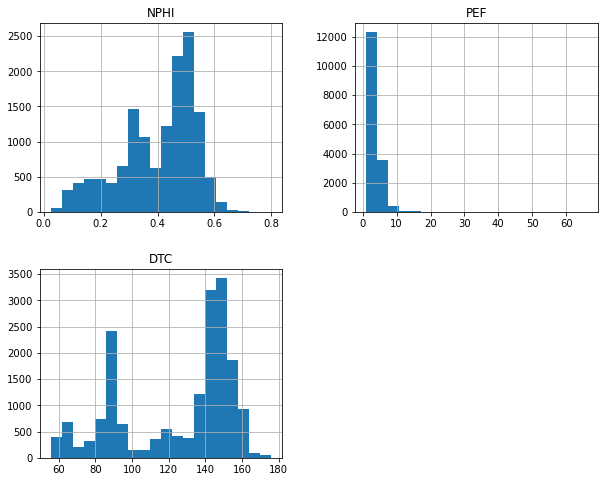

In [12]:
#plotting histograms for missing value imputation
df.hist(column = ["NPHI", "PEF","DTC"],  bins=20,figsize= (10,8))
plt.show()

- column NPH is can be taken as approximately symmetric distribution. So missing values are replaced with mean.
- columns PEF and DTC are skewed.So missing values are replaced with median.

In [13]:
df["NPHI"].fillna(df["NPHI"].mean(), inplace =True)

In [14]:
for col in ["PEF","DTC"]:
    df[col] = df[col].fillna(df[col].mean())

In [15]:
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

### Outlier Handling

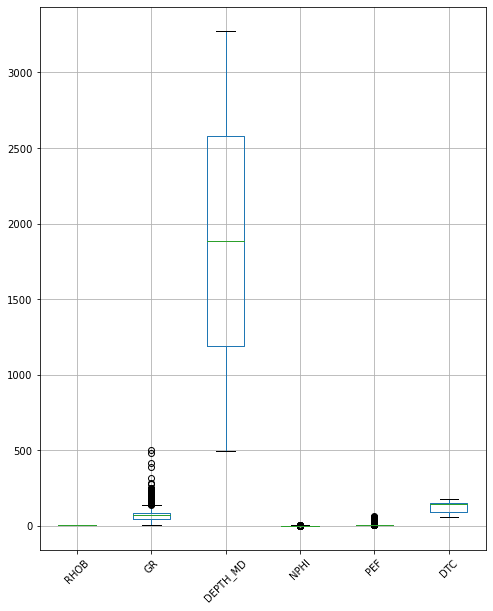

In [16]:
df.boxplot(figsize= (8,10))
plt.xticks(rotation = 45)
plt.show()

In [17]:
ot_lr_cols = df.columns.tolist()
print(ot_lr_cols)

['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']


In [18]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3- q1
    upper_bound =q3+1.5*iqr
    lower_bound =q1-1.5*iqr
    df[column_name] = df [column_name].clip(upper = upper_bound)
    df[column_name] = df [column_name].clip(lower = lower_bound)
    return df[column_name]
for col in ot_lr_cols:
    df[col] = remove_outliers(df, col)

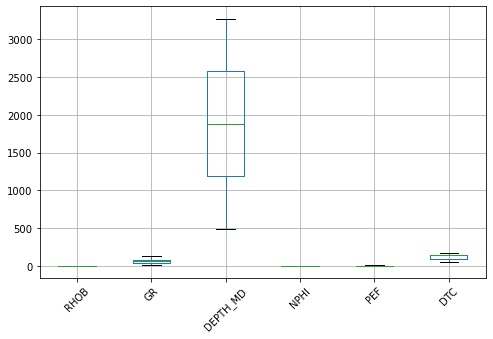

In [19]:
df.boxplot(figsize= (8,5))
plt.xticks(rotation = 45)
plt.show()

## Scaling

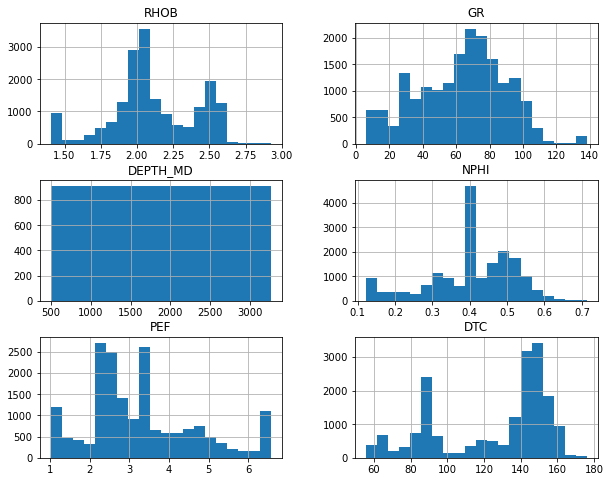

In [20]:
df.hist(bins=20, figsize= (10,8))

plt.show()

In [21]:
# Identify columns to scale
symmetric_cols = ["RHOB","GR"]
skewed_cols = ["NPHI","PEF","DTC"]

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply log transformation for skewed columns to reduce skewness
for col in skewed_cols:
    df[col] = np.log1p(df[col])

# Apply MinMaxScaler for skewed columns
df[skewed_cols] = min_max_scaler.fit_transform(df[skewed_cols])

# Apply StandardScaler for symmetric columns
df[symmetric_cols] = standard_scaler.fit_transform(df[symmetric_cols])

print("Scaling complete. Scaled data:")
df.head(3)



Scaling complete. Scaled data:


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,0.648114,494.528,0.529936,1.0,0.923105
1,-0.741163,0.612133,494.680,0.529936,1.0,0.920239
2,-0.718560,0.441774,494.832,0.529936,1.0,0.917898


## K Means Clustering

In [22]:
X = df[["NPHI","DTC"]]

In [23]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

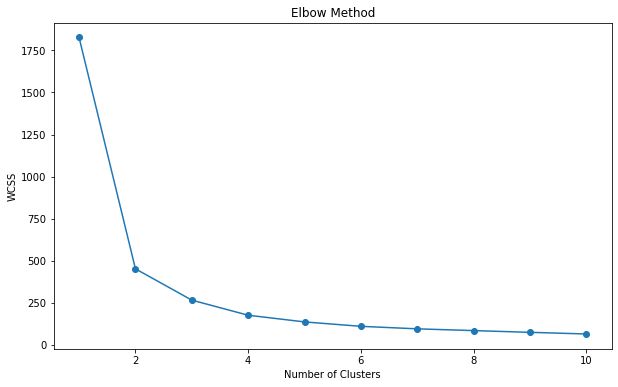

In [24]:
#plotting Elbow Method
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# applying k means clustering with optimal number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [26]:
# Adding cluster labels to the dataset
df['Cluster'] = y_kmeans
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,-0.759999,0.648114,494.528,0.529936,1.0,0.923105,1
1,-0.741163,0.612133,494.680,0.529936,1.0,0.920239,1
2,-0.718560,0.441774,494.832,0.529936,1.0,0.917898,1
3,-0.734045,0.367235,494.984,0.529936,1.0,0.917766,1
4,-0.773944,0.323128,495.136,0.529936,1.0,0.917651,1


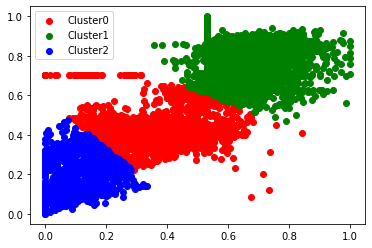

In [27]:
# assigning custom colors to clusters
colors = ['r','g','b','y','m']

for i in range(3):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['NPHI'],
              cluster_data['DTC'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [28]:
# function to predict cluster for a new instance
def predict_cluster(NPHI, DTC):
  new_data = [[NPHI, DTC]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [29]:
# example
new_NPHI = 0.81
new_DTC = 0.34

predicted_cluster = predict_cluster(new_NPHI,new_DTC)
print(f'The new data belongs to cluster: {predicted_cluster}')

The new data belongs to cluster: 0


In [30]:
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.6667440235649368


## Experiment with different K values and plot the result

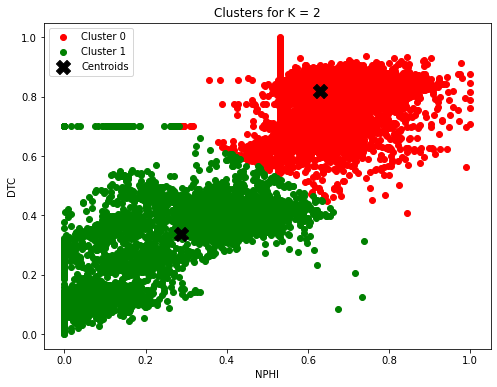

Silhouette Score for K = 2: 0.694


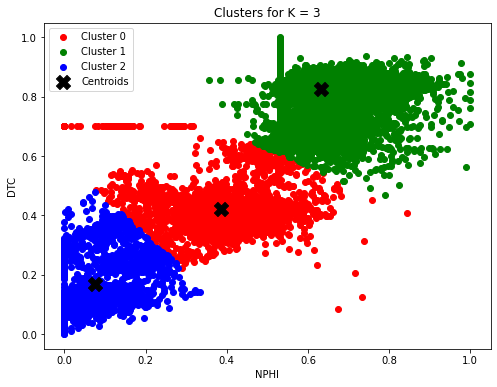

Silhouette Score for K = 3: 0.667


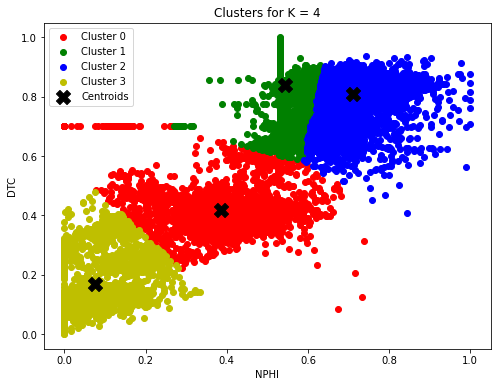

Silhouette Score for K = 4: 0.522


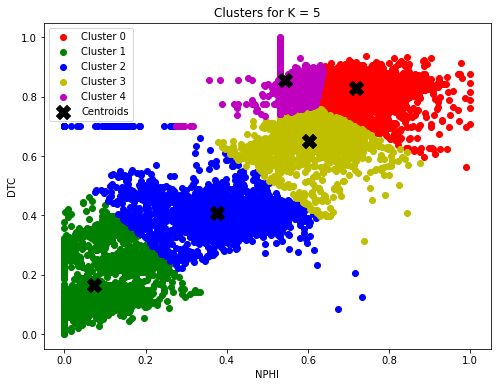

Silhouette Score for K = 5: 0.551


In [31]:
k_values = range(2, 6)  
colors = ['r', 'g', 'b', 'y', 'm']

for k in k_values:
    # Apply K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_data = X[y_kmeans == i]
        plt.scatter(cluster_data['NPHI'], cluster_data['DTC'], c=colors[i], label=f'Cluster {i}')
    
    # Plot centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='black', marker='X', label='Centroids')
    
    plt.title(f'Clusters for K = {k}')
    plt.xlabel('NPHI')
    plt.ylabel('DTC')
    plt.legend()
    plt.show()

    # Print Silhouette Score
    silhouette_avg = silhouette_score(X, y_kmeans)
    print(f'Silhouette Score for K = {k}: {silhouette_avg:.3f}')
